# Import libraries

In [1]:
#pip install bs4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import joblib

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

C:\Users\HYP\anaconda3\envs\myTensor\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HYP\anaconda3\envs\myTensor\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\HYP\anaconda3\envs\myTensor\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Read data

In [2]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./valid.csv')

In [3]:
train.head()

,headline,label
0,મોદી સરકાર 1 ફેબ્રુઆરીએ વચગાળાનું બજેટ રજૂ કરશ...,business
1,LIC પોલિસી ધારકો માટે મોટી ખબર! પ્રીમિયમ જમા ક...,business
2,"VIRAL VIDEO: મસ્તમૌલા અંદાજમાં રણવીર સિંહ, ચાર...",entertainment
3,શાહરૂખની સાથે ફિલ્મમાં કામ કરી ચુક્યો છે અનુષ્...,entertainment
4,એકદમ બટરફ્લાઇ અવતારમાં જોવા મળી આ એક્ટ્રેસ,entertainment


In [4]:
train.label.value_counts()

entertainment    2321
business         1840
tech             1108
Name: label, dtype: int64

In [5]:
train.shape

(5269, 2)

In [6]:
test.head()

,headline,label
0,IT ડિપાર્ટમેન્ટ 1 લાખ લોકો સામે કરશે દંડનાત્મક...,business
1,"વિરાટની સેન્ચુરી પર અનુષ્કા ખુશ, ઇન્સ્ટાગ્રામ ...",entertainment
2,'જમાઇ રાજા' ની આ હોટ એકટ્રેસના બિકિની ફોટાએ લગ...,entertainment
3,"કરીનાએ સૈફના બર્થડે પર રાખી સ્પેશિયલ પાર્ટી, જ...",entertainment
4,"ભારતમાં નોકરી કરવા માટે બેસ્ટ છે આ કંપની, શું ...",business


In [7]:
test.shape

(1318, 2)

# Data processing

In [8]:
# Remove HTML tags
def remove_html(text):
    soup=BeautifulSoup(text,'lxml')
    html_free=soup.get_text()
    return html_free

train['headline']=train['headline'].apply(lambda x: remove_html(x))
test['headline']=test['headline'].apply(lambda x: remove_html(x))

In [9]:
# Remove URLs
train['headline']=train['headline'].str.replace('http\S+|www.\S+', '', case=False)
test['headline']=test['headline'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\HYP\anaconda3\envs\myTensor\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\HYP\anaconda3\envs\myTensor\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Remove the hashtags and @
train['headline']=train['headline'].str.replace('@', '', case=False)
test['headline']=test['headline'].str.replace('@', '', case=False)

train['headline']=train['headline'].str.replace('#', '', case=False)
test['headline']=test['headline'].str.replace('#', '', case=False)

In [12]:
# Remove stopwords
# stopwords_guj = ['લેતા','શા','ઉભા','હો','હોઈ','મા','મૂકી','નહી','બધું','હા','મી','એન','તું','નો','છો','જી','લેવા','આર','છીએ','નં','એવ',
#                  'હોવા','તેથી','નું','છ','એવા','એની','થતાં','જેવી','બંને','હશે','માં','ની','હતાં','તેવી','થયો','એવી','થી','થયું','ત્યાં',
#                  'બની','ગયો','છતાં','આપી','રહે','તેઓ','પાસે','તેમ','ને','તેને','હું','બાદ','શકે','જો','અંગે','રહી','એમ','તેના','કરે','થઇ',
#                  'સુધી','જાય','રૂા','કોઈ','ના','હવે','તેની','સામે','આવે','બે','થઈ','ન','જે','આવી','તા','પર','હોય','હતું','એ','કરી','તે',
#                  'હતી','માટે','તો','જ','પણ','કે','આ','અને','છે']

# def remove_stopwords(text):
#     words=[w for w in text if w not in stopwords_guj]
#     return words

# train['headline']=train['headline'].apply(lambda x: remove_stopwords(x))
# test['headline']=test['headline'].apply(lambda x: remove_stopwords(x))

# Feature extraction using TF-IDF and pipeline creation

In [11]:
X=train['headline']
y=train['label']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Model fitting

In [13]:
text_clf.fit(X, y)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [14]:
# Save model
loaded_model = joblib.dump(text_clf, 'guju_model.pkl')

In [15]:
test_X=test['headline']
test_y=test['label']

# Predictions

In [16]:
predictions = text_clf.predict(test_X)

# Evaluation metrics

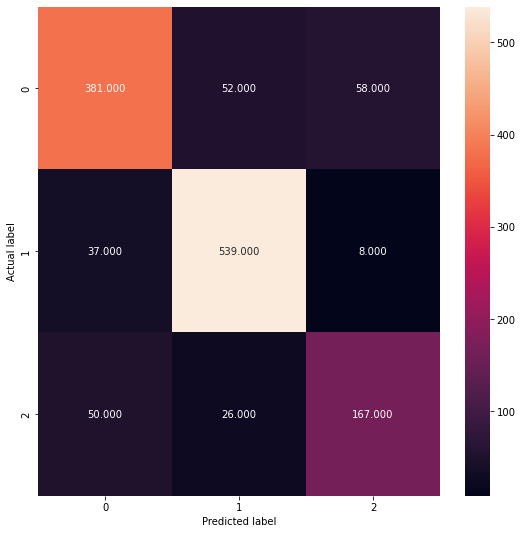

In [17]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [18]:
cm

array([[381,  52,  58],
       [ 37, 539,   8],
       [ 50,  26, 167]], dtype=int64)

In [19]:
accu = metrics.classification_report(test_y, predictions)
print(accu)

               precision    recall  f1-score   support

     business       0.81      0.78      0.79       491
entertainment       0.87      0.92      0.90       584
         tech       0.72      0.69      0.70       243

     accuracy                           0.82      1318
    macro avg       0.80      0.80      0.80      1318
 weighted avg       0.82      0.82      0.82      1318



# Custom prediction

In [20]:
# Example text
simple_test = ["કરીનાએ સૈફના બર્થડે પર રાખી સ્પેશિયલ પાર્ટી, જુઓ ફોટા"]
pred1 = text_clf.predict(simple_test)
pred1

array(['entertainment'], dtype=object)

In [21]:
# Example text
simple_test = ["RTIમાં ખુલાસોઃ આ દેશોને અડધી કિંમતમાં પેટ્રોલ-ડીઝલ આપે છે ભારત!"]
pred2 = text_clf.predict(simple_test)
pred2

array(['business'], dtype=object)

In [22]:
# Example text
simple_test = ["મોબાઈલ એપ લોન્ચ: એસટી બસમાં એડવાન્સ કરાવી શકાશે બુકીંગી"]
pred3 = text_clf.predict(simple_test)
pred3

array(['tech'], dtype=object)

# Load model

In [23]:
model = joblib.load('guju_model.pkl')

In [24]:
simple_test = ["મોબાઈલ એપ લોન્ચ: એસટી બસમાં એડવાન્સ કરાવી શકાશે બુકીંગી"]
pred4 = model.predict(simple_test)
pred4[0]

'tech'